In [601]:
import os.path
import random
import sys
import numpy as np
from stats import mean, de_mean, standard_deviation, correlation
from gradient_descent import minimize_stochastic
import matplotlib.pyplot as plt

In [602]:
def vector_subtract(v, w):
    """subtracts corresponding elements"""
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c, v):
    """c is a number, v is a vector"""
    return [c * v_i for v_i in v]

def in_random_order(data):
#"""generator	that	returns	the	elements	of	data	in	random	order"""
    indexes = [i for i,_ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]

def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data = list(zip(x, y))
    
    # initial guess
    theta = theta_0
    
    # initial step size
    alpha = alpha_0
    
    # the minimum so far
    min_theta, min_value = None, float("inf")
    iterations_with_no_improvement = 0

    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum(target_fn(x_i, y_i, theta) for x_i, y_i in data)

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points
        for x_i, y_i in data:
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))

    return min_theta

In [603]:
data = np.loadtxt("ex1data2.txt",dtype=np.float64,delimiter=",")
data[:5,::] #dataset loaded demonstration

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

In [604]:
# Break datasets into X and Y.
X_0 = np.array(data[::,0:2])
X_1 = np.array(data[::,0])
X_2 = np.array(data[::,1])
Y = data[::,-1:]
X_10 = np.sort(X_1)
X_10 = X_10[::-1]
X_10 = X_10.tolist()
# X_10
Y

array([[399900.],
       [329900.],
       [369000.],
       [232000.],
       [539900.],
       [299900.],
       [314900.],
       [198999.],
       [212000.],
       [242500.],
       [239999.],
       [347000.],
       [329999.],
       [699900.],
       [259900.],
       [449900.],
       [299900.],
       [199900.],
       [499998.],
       [599000.],
       [252900.],
       [255000.],
       [242900.],
       [259900.],
       [573900.],
       [249900.],
       [464500.],
       [469000.],
       [475000.],
       [299900.],
       [349900.],
       [169900.],
       [314900.],
       [579900.],
       [285900.],
       [249900.],
       [229900.],
       [345000.],
       [549000.],
       [287000.],
       [368500.],
       [329900.],
       [314000.],
       [299000.],
       [179900.],
       [299900.],
       [239500.]])

In [605]:
# Setup bias array
X_ones = np.ones(len(X_0))
# Concentate arrays
# X = [X_ones,X_0]
X1 = np.vstack((X_ones.T,X_0.T))
# X1 = [[X_ones],[X_0]]

# X1.T

In [606]:
Theta = np.linalg.pinv(X1.dot(X1.T)).dot(X1).dot(Y)
Theta

array([[89597.90954361],
       [  139.21067402],
       [-8738.01911255]])

In [607]:
theta_0 = np.linalg.pinv(X1.dot(X1.T))
theta_1 = theta_0.dot(X1)
theta_2 = theta_1.dot(Y)
theta_2

array([[89597.90954361],
       [  139.21067402],
       [-8738.01911255]])

In [608]:
# Feature Scaling
# Mean
mean_size = np.mean(X1[1],axis=0)
mean_bedroom = np.mean(X1[2],axis=0)
# Standard Deviation
std_size = np.std(X1[1],axis=0)
std_bedroom = np.std(X1[2],axis=0)
# Scaling
X1[1] = (X1[1] - mean_size)/std_size
X1[2] = (X1[2] - mean_bedroom)/std_bedroom
X11 = X1
X11[1]

array([ 1.31415422e-01, -5.09640698e-01,  5.07908699e-01, -7.43677059e-01,
        1.27107075e+00, -1.99450507e-02, -5.93588523e-01, -7.29685755e-01,
       -7.89466782e-01, -6.44465993e-01, -7.71822042e-02, -8.65999486e-04,
       -1.40779041e-01,  3.15099326e+00, -9.31923697e-01,  3.80715024e-01,
       -8.65782986e-01, -9.72625673e-01,  7.73743478e-01,  1.31050078e+00,
       -2.97227261e-01, -1.43322915e-01, -5.04552951e-01, -4.91995958e-02,
        2.40309445e+00, -1.14560907e+00, -6.90255715e-01,  6.68172729e-01,
        2.53521350e-01,  8.09357707e-01, -2.05647815e-01, -1.27280274e+00,
        5.00114703e-02,  1.44532608e+00, -2.41262044e-01, -7.16966387e-01,
       -9.68809863e-01,  1.67029651e-01,  2.81647389e+00,  2.05187753e-01,
       -4.28236746e-01,  3.01854946e-01,  7.20322135e-01, -1.01841540e+00,
       -1.46104938e+00, -1.89112638e-01, -1.01459959e+00])

In [609]:
def predict(x, beta):
    """assumes that the first element of x is 1"""
#     print("X: \n", x)
    return np.dot(x, beta)

In [610]:
def error(x, y, beta):
    return predict(x, beta) - y

def squared_error(x, y, beta):
    return error(x, y, beta) ** 2

def sqerror_gradient(x, y, beta):
    err = error(x, y, beta)
    return [2 * err * x_i for x_i in x]

def cost(X_bias,Y,Theta):
#     np.seterr(over='raise')
    m = X_bias.shape
    Theta = np.array(Theta)
    hypothesis = X_bias.dot(Theta)
    cost_val = (1/(2*m[0]))*((np.square(hypothesis-Y)).sum(axis=0))
    return cost_val

In [611]:
def minimize_stochastic_v5(target_fn, gradient_fn, x, y, theta_0, alpha_0):
    data = list(zip(x, y))
    
    # initial guess
    theta = theta_0
    
    # initial step size
    alpha = alpha_0 
    
    # the minimum so far
    min_theta, min_value = None, float("inf")
    iterations_with_no_improvement = 0
    
    tol = 1e-2
    min_theta_1 = 0
    cnt = 0
    
    tol2 = []

    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum(target_fn(x_i, y_i, theta) for x_i, y_i in data)

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
#             tol1 = min_theta_1 - np.sum(min_theta)
#             tol = abs(tol1)
#             print('Tol: \n',tol)
    #         print(tol)
    #         min_theta_1 = min_theta[0][0]
#             min_theta_1 = np.sum(min_theta)
            iterations_with_no_improvement -= 1
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9
            
#         print('alpha:\n',alpha)

        # and take a gradient step for each of the data points
        for x_i, y_i in data:
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
#             cost_val = cost(x_i,y,theta)
            
            
#         cost_val = cost(x,y,theta)
#         print('Cost Val', cost_val)
            
#         Y_err_1 = theta_0 - min_theta
#         Y_err_1_sq = np.square(Y_err_1)
#         tol = np.sum(Y_err_1_sq)
#         tol = squared_error(x_i, y_i, min_theta)
#         print('Y_error:', tol)
            
        cnt += 1
            
#         tol1 = (min_theta_1 - np.sum(min_theta))
#         print('tol1: \n',tol)
#         tol2.append(tol1)
        

    return min_theta,cnt

In [612]:
# Theta_0 = np.array([1,0,0])
Theta_0 = np.random.rand(1,3)
min_theta,cnt = minimize_stochastic_v5(squared_error,
                                  sqerror_gradient,
                                  X1.T,
                                  Y,
                                  Theta,
                                  0.003)
print(min_theta)
print(cnt)

[array([339946.16340016]), array([108130.39986248]), array([-7148.92519906])]
1088


In [613]:
# min_theta = minimize_stochastic(squared_error,
#                                   sqerror_gradient,
#                                   X1.T,
#                                   Y,
#                                   Theta,
#                                   0.3)
# min_theta

In [614]:
xx_i = []
for x_i in X1.T:
    xx_i.append(x_i)
    
print(X1.shape)

y_hat = [predict(x_i,min_theta) for x_i in X1.T]
y_hat = np.sort(y_hat)
np.max(y_hat)
# y_hat
# y_hat_alt = []
# for i in range(len(y_hat)):
#     y_hat_alt.append(y_hat[i][0])
# yy2 = np.sort()
# print(yy2)
# y_hat_alt


(3, 47)


663288.8348988723

In [615]:
# predict the price of a house with 1650 square feet and 3 bedrooms
# add bias unit 1.0
X_predict = np.array([1.0,1650.0,3]) 
#feature scaling the data first
X_predict[1] = (X_predict[1] - mean_size)/ (std_size) 
X_predict[2] = (X_predict[2]- mean_bedroom)/ (std_bedroom)
hypothesis = X_predict.dot(min_theta)
print("Cost of house with 1650 sq ft and 3 bedroom is ",hypothesis)

Cost of house with 1650 sq ft and 3 bedroom is  [293331.58699955]


In [616]:
def predict_line(alpha, beta, x_i):
    return beta * x_i + alpha

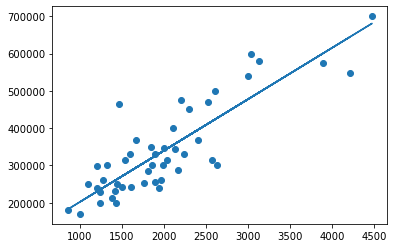

In [617]:
y_hat_line = [predict_line(min_theta[0],min_theta[1],x_i) for x_i in X11[1]]
# y_hat_line = [predict(x_i, min_theta) for x_i in X11[1]]
y_hat_line
plt.scatter(X_1,Y)
plt.plot(X_1,y_hat_line)

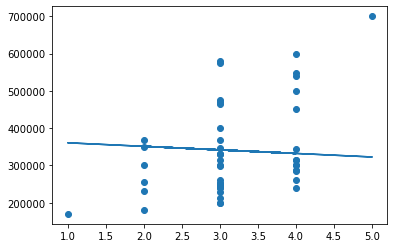

In [618]:
y_hat_line = [predict_line(min_theta[0],min_theta[2],x_i) for x_i in X11[2]]
# y_hat_line = [predict(x_i, min_theta) for x_i in X11[1]]
y_hat_line
plt.scatter(X_2,Y)
plt.plot(X_2,y_hat_line)

In [619]:
sumofsquares = 0
sumofresiduals = 0
score = 0

# y_hat = [predict(x_i,min_theta_2) for x_i in X1.T]

Y1 = (Y - np.mean(Y,axis=0))/np.std(Y,axis=0)

y_mean = np.mean(Y1)
min_theta_2 = np.array(min_theta)

# for i in X1.T:
#     y_pred = predict(x_i,min_theta_2)
#     sumofsquares += (Y[])
# for x_i in X1.T:
#     print(x_i)
# X12 = X1.T
# y_pred = X1.T.dot(min_theta_2)
for i in range(len(Y)):
#     X_pred = np.array(X_predict[i])
#     y_pred = X1.T.dot(min_theta_2)
    y_pred = X_predict.dot(min_theta)
#     print(y_pred)
#     y_pred = Theta[0] + Theta[1]*X_bias
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) ** 2
#     score += 1 - np.mean(sumofresiduals/sumofsquares)
#     print(score[0])
    
score = 1 - (sumofresiduals/sumofsquares)
# print(np.abs(np.mean(score)))
# print(np.mean(score))
# print(np.mean(score))
print(score)



[0.86645425]


In [620]:
# sumofsquares = 0
# sumofresiduals = 0

# # y_hat = [predict(x_i,min_theta_2) for x_i in X1.T]
# y_mean = np.mean(Y)

# # for i in X1.T:
# #     y_pred = predict(x_i,min_theta_2)
# #     sumofsquares += (Y[])
# # for x_i in X1.T:
# #     print(x_i)
# X12 = X1.T
# min_theta = np.array(min_theta)
# for i in range(len(Y)):
#     y_pred = predict(X12[i],min_theta)
# #     y_pred = X_predict.dot(min_theta)
#     sumofsquares = (Y[i] - y_mean) ** 2
#     sumofresiduals = (Y[i] - y_pred) ** 2
#     score = 1 - (sumofresiduals/sumofsquares)
# #     print(score[0])
    
# # score = 1 - (sumofresiduals/sumofsquares)
# print(score[0])


In [621]:
# sumofsquares = 0
# sumofresiduals = 0

# # y_hat = [predict(x_i,min_theta_2) for x_i in X1.T]
# y_mean = np.mean(Y)

# # for i in X1.T:
# #     y_pred = predict(x_i,min_theta_2)
# #     sumofsquares += (Y[])
# # for x_i in X1.T:
# #     print(x_i)
# X12 = X1.T
# min_theta = np.array(min_theta)
# for i in range(len(Y)):
#     y_pred = predict(X12[i],min_theta)
# #     y_pred = X_predict.dot(min_theta)
#     sumofsquares = (Y[i] - y_mean) ** 2
#     sumofresiduals = (Y[i] - y_pred) ** 2
#     score = 1 - (sumofresiduals/sumofsquares)
# #     print(score[0])
    
# # score = 1 - (sumofresiduals/sumofsquares)
# print(score[0])


In [622]:
X12 = X1.T
print(X12)
y_pred = predict(X12,min_theta)
y_pred
X12[0]

[[ 1.00000000e+00  1.31415422e-01 -2.26093368e-01]
 [ 1.00000000e+00 -5.09640698e-01 -2.26093368e-01]
 [ 1.00000000e+00  5.07908699e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.43677059e-01 -1.55439190e+00]
 [ 1.00000000e+00  1.27107075e+00  1.10220517e+00]
 [ 1.00000000e+00 -1.99450507e-02  1.10220517e+00]
 [ 1.00000000e+00 -5.93588523e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.29685755e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.89466782e-01 -2.26093368e-01]
 [ 1.00000000e+00 -6.44465993e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.71822042e-02  1.10220517e+00]
 [ 1.00000000e+00 -8.65999486e-04 -2.26093368e-01]
 [ 1.00000000e+00 -1.40779041e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.15099326e+00  2.43050370e+00]
 [ 1.00000000e+00 -9.31923697e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.80715024e-01  1.10220517e+00]
 [ 1.00000000e+00 -8.65782986e-01 -1.55439190e+00]
 [ 1.00000000e+00 -9.72625673e-01 -2.26093368e-01]
 [ 1.00000000e+00  7.73743478e-01  1.10220517e+00]
 [ 1.00000000e+00  1.31050078e+

array([ 1.        ,  0.13141542, -0.22609337])

In [623]:
sumofsquares = (Y - y_mean) ** 2
sumofresiduals = (Y - y_pred) ** 2
score = 1 - (sumofresiduals/sumofsquares)
score.mean()

0.9646107760403364

In [624]:
# sumofresiduals
# sumofsquares 

In [625]:
yym = y_mean * np.ones((len(Y),1))
sumofsquares = (Y - yym) ** 2
# sumofsquares

In [626]:
# score = 1 - (sumofresiduals/sumofsquares)
# score.mean()

In [627]:
ssr = sumofresiduals.T.dot(sumofresiduals)
ssq = sumofsquares.T.dot(sumofsquares)
ssr

array([[2.72040979e+21]])

In [628]:
score = 1 - (ssr/ssq)
score[0]

array([0.99789425])

In [629]:
# # Building the model
# X_mean = np.mean(X12)
# X_mean_arr = [np.mean(X12.T[0]),np.mean(X12.T[1]),np.mean(X12.T[2])]
# Y_mean = np.mean(Y)

# X12[0] - X_mean_arr

# # num = 0
# # den = 0
# # for i in range(len(X12)):
# #     num += (X12[i] - X_mean_arr)*(Y[i] - Y_mean)
# #     den += (X12[i] - X_mean_arr)**2
# # m = num / den
# # c = Y_mean - m*X_mean

# # print (m, c)

[105764.13349282] [340412.65957447]


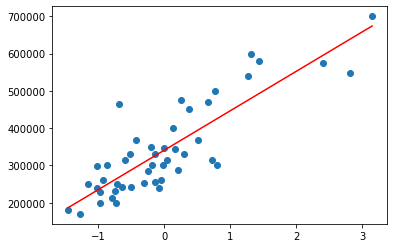

In [630]:
# Building the model
X = X11[1]
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print (m, c)


# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()




[105764.13349282] [340412.65957447]


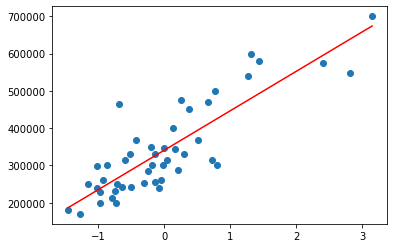

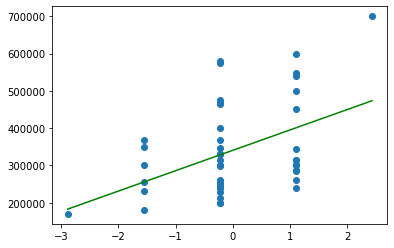

In [631]:
# Building the model
X1 = X11[1]
X_mean_1 = np.mean(X1)
X2 = X11[2]
X_mean_2 = np.mean(X2)
# Y1 = (Y - np.mean(Y,axis=0))/np.std(Y,axis=0)
Y_mean = np.mean(Y)

num1 = 0
den1 = 0
num2 = 0
den2 = 0
for i in range(len(X1)):
    num1 += (X1[i] - X_mean_1)*(Y[i] - Y_mean)
    den1 += (X1[i] - X_mean_1)**2
    num2 += (X2[i] - X_mean_2)*(Y[i] - Y_mean)
    den2 += (X2[i] - X_mean_2)**2
m1 = num1 / den1
m2 = num2 / den2
c1 = Y_mean - m1*X_mean_1 - m2*X_mean_2

print(m1, c1)


# Making predictions
Y_pred_1 = m1*X1 + c1
Y_pred_2 = m2*X2 + c1

plt.scatter(X1, Y) # actual
plt.plot([min(X1), max(X1)], [min(Y_pred_1), max(Y_pred_1)], color='red') # predicted
# plt.plot(X,Y_pred)
plt.show()

plt.scatter(X2, Y) # actual
plt.plot([min(X2), max(X2)], [min(Y_pred_2), max(Y_pred_2)], color='green') # predicted
# plt.plot(X,Y_pred)
plt.show()

In [632]:
# predict the price of a house with 1650 square feet and 3 bedrooms
min_theta_3 = [c1,m2,m1]
# add bias unit 1.0
X_predict = np.array([1.0,1650.0,3]) 
#feature scaling the data first
X_predict[1] = (X_predict[1] - mean_size)/ (std_size) 
X_predict[2] = (X_predict[2]- mean_bedroom)/ (std_bedroom)
hypothesis = X_predict.dot(min_theta_3)
print("Cost of house with 1650 sq ft and 3 bedroom is ",hypothesis)

Cost of house with 1650 sq ft and 3 bedroom is  [292097.55641418]


In [633]:
sumofsquares = 0
sumofresiduals = 0
score = 0

# y_hat = [predict(x_i,min_theta_2) for x_i in X1.T]

Y1 = (Y - np.mean(Y,axis=0))/np.std(Y,axis=0)

y_mean = np.mean(Y1)
# min_theta_2 = np.array(min_theta_3)

# for i in X1.T:
#     y_pred = predict(x_i,min_theta_2)
#     sumofsquares += (Y[])
# for x_i in X1.T:
#     print(x_i)
# X12 = X1.T
# y_pred = X1.T.dot(min_theta_2)
for i in range(len(Y)):
#     X_pred = np.array(X_predict[i])
#     y_pred = X1.T.dot(min_theta_2)
    y_pred = X_predict.dot(min_theta_3)
#     print(y_pred)
#     y_pred = Theta[0] + Theta[1]*X_bias
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) ** 2
#     score += 1 - np.mean(sumofresiduals/sumofsquares)
#     print(score[0])
    
score = 1 - (sumofresiduals/sumofsquares)
# print(np.abs(np.mean(score)))
# print(np.mean(score))
# print(np.mean(score))
print(score)



[0.86555687]


In [634]:
y_pred = predict(X12,min_theta_3)
# sumofsquares = (Y - y_mean) ** 2
sumofresiduals = (Y - y_pred) ** 2
# score = 1 - (sumofresiduals/sumofsquares)
score.mean()
y_mean_array = y_mean * np.ones((len(Y),1))
sumofsquares = (Y - y_mean_array) ** 2
ssr = sumofresiduals.T.dot(sumofresiduals)
ssq = sumofsquares.T.dot(sumofsquares)
score = 1 - (ssr/ssq)
np.squeeze(score)

array(0.98642098)

In [635]:
def update_weights(m,n,b, X, Y, learning_rate):
    m_deriv = 0
    n_deriv = 0
    b_deriv = 0
    X1 = X[1]
    X2 = X[2]
    N = len(Y)
    for i in range(N):
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        m_deriv += -2*X1[i] * (Y[i] - (m*X1[i] + n*X2[i] + b))
        n_deriv += -2*X2[i] * (Y[i] - (m*X1[i] + n*X2[i] + b))
        # -2(y - (mx + b))
        b_deriv += -2*(Y[i] - (m*X1[i] + n*X2[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate
    n -= (n_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m,n,b

In [636]:
m = Theta[2]
n = Theta[1]
b = Theta[0]

m,n,b = update_weights(m,n,b, X11, Y, 0.3)
print(m,n,b)

[59916.5004035] [35816.77980347] [240086.75956212]


In [637]:
min_theta = [b,n,m]
# predict the price of a house with 1650 square feet and 3 bedrooms
# add bias unit 1.0
X_predict = np.array([1.0,1650.0,3]) 
#feature scaling the data first
X_predict[1] = (X_predict[1] - mean_size)/ (std_size) 
X_predict[2] = (X_predict[2]- mean_bedroom)/ (std_bedroom)
hypothesis = X_predict.dot(min_theta)
print("Cost of house with 1650 sq ft and 3 bedroom is ",hypothesis)

Cost of house with 1650 sq ft and 3 bedroom is  [210564.18148438]


In [639]:
y_pred = predict(X11.T,min_theta)
# sumofsquares = (Y - y_mean) ** 2
sumofresiduals = (Y - y_pred) ** 2
# score = 1 - (sumofresiduals/sumofsquares)
score.mean()
y_mean_array = y_mean * np.ones((len(Y),1))
sumofsquares = (Y - y_mean_array) ** 2
ssr = sumofresiduals.T.dot(sumofresiduals)
ssq = sumofsquares.T.dot(sumofsquares)
score = 1 - (ssr/ssq)
np.squeeze(score)

array(0.96870244)

In [640]:
sumofsquares = 0
sumofresiduals = 0
score = 0

# y_hat = [predict(x_i,min_theta_2) for x_i in X1.T]

Y1 = (Y - np.mean(Y,axis=0))/np.std(Y,axis=0)

y_mean = np.mean(Y1)
min_theta_2 = np.array(min_theta)

# for i in X1.T:
#     y_pred = predict(x_i,min_theta_2)
#     sumofsquares += (Y[])
# for x_i in X1.T:
#     print(x_i)
# X12 = X1.T
# y_pred = X1.T.dot(min_theta_2)
for i in range(len(Y)):
#     X_pred = np.array(X_predict[i])
#     y_pred = X1.T.dot(min_theta_2)
    y_pred = X_predict.dot(min_theta)
#     print(y_pred)
#     y_pred = Theta[0] + Theta[1]*X_bias
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) ** 2
#     score += 1 - np.mean(sumofresiduals/sumofsquares)
#     print(score[0])
    
score = 1 - (sumofresiduals/sumofsquares)
# print(np.abs(np.mean(score)))
# print(np.mean(score))
# print(np.mean(score))
print(score)



[0.75482402]
